#### Mounting Drive



In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Importing libraries

In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import numpy as np
import math

In [12]:
def logistic(z):
   return (1/(1+np.exp(-z)))

# Classification Task

#### linearly separable Data

In [13]:
class_1 = '/content/drive/MyDrive/Deep_learning/Group09_Assignment1/Classification/LS_Group09/Class1.txt'
class_2 = '/content/drive/MyDrive/Deep_learning/Group09_Assignment1/Classification/LS_Group09/Class2.txt'
class_3 = '/content/drive/MyDrive/Deep_learning/Group09_Assignment1/Classification/LS_Group09/Class3.txt'

In [14]:
data_class_1 = np.loadtxt(class_1, delimiter=' ', skiprows=0, dtype=str)
data_class_2 = np.loadtxt(class_2, delimiter=' ', skiprows=0, dtype=str)
data_class_3 = np.loadtxt(class_3, delimiter=' ', skiprows=0, dtype=str)

data_class_1=np.insert(data_class_1.astype(float), 0, 1, axis=1)
data_class_2=np.insert(data_class_2.astype(float), 0, 1, axis=1)
data_class_3=np.insert(data_class_3.astype(float), 0, 1, axis=1)

train_c1,val_c1,test_c1=np.split(data_class_1,[int(0.6 * len(data_class_1)),int(0.8 * len(data_class_1))])
train_c2,val_c2,test_c2=np.split(data_class_2,[int(0.6 * len(data_class_1)),int(0.8 * len(data_class_1))])
train_c3,val_c3,test_c3=np.split(data_class_3,[int(0.6 * len(data_class_1)),int(0.8 * len(data_class_1))])


#### Plotting linearly separable Data

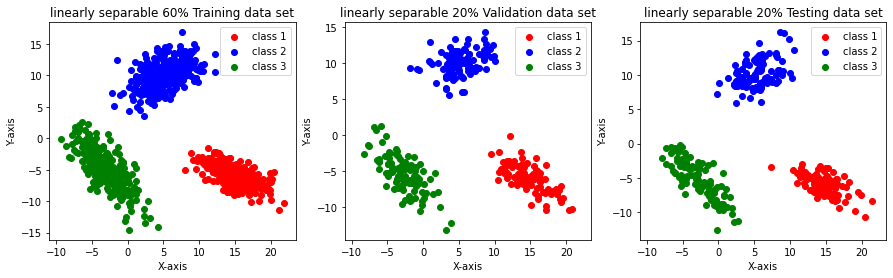

In [16]:
fig, ax = plt.subplots(1,3,figsize=(15,4), sharex=True)
ax[0].scatter(np.delete(train_c1,[0,2],axis=1) ,np.delete(train_c1,[0,1],axis=1) , color='red', label='class 1')
ax[0].scatter(np.delete(train_c2,[0,2],axis=1) ,np.delete(train_c2,[0,1],axis=1), color='blue', label='class 2')
ax[0].scatter(np.delete(train_c3,[0,2],axis=1) ,np.delete(train_c3,[0,1],axis=1), color='green', label='class 3')
ax[0].legend()
ax[0].set_xlabel('X-axis')
ax[0].set_ylabel('Y-axis')
ax[0].title.set_text("linearly separable 60% Training data set") 

ax[1].scatter(np.delete(test_c1,[0,2],axis=1) ,np.delete(test_c1,[0,1],axis=1) , color='red', label='class 1')
ax[1].scatter(np.delete(test_c2,[0,2],axis=1) ,np.delete(test_c2,[0,1],axis=1), color='blue', label='class 2')
ax[1].scatter(np.delete(test_c3,[0,2],axis=1) ,np.delete(test_c3,[0,1],axis=1), color='green', label='class 3')
ax[1].legend()
ax[1].set_xlabel('X-axis')
ax[1].set_ylabel('Y-axis')
ax[1].title.set_text("linearly separable 20% Validation data set")

ax[2].scatter(np.delete(val_c1,[0,2],axis=1) ,np.delete(val_c1,[0,1],axis=1) , color='red', label='class 1')
ax[2].scatter(np.delete(val_c2,[0,2],axis=1) ,np.delete(val_c2,[0,1],axis=1), color='blue', label='class 2')
ax[2].scatter(np.delete(val_c3,[0,2],axis=1) ,np.delete(val_c3,[0,1],axis=1), color='green', label='class 3')
ax[2].legend()
ax[2].set_xlabel('X-axis')
ax[2].set_ylabel('Y-axis')
ax[2].title.set_text("linearly separable 20% Testing data set")
plt.show()


##### Training linearly separable Neural Network 

In [17]:
training_data=np.concatenate((train_c1, train_c2,train_c3), axis=0)
Training_target_label= np.concatenate((np.zeros(len(train_c1)),np.ones(len(train_c2)),np.ones(len(train_c3))*2), axis=None)

validation_data=np.concatenate((val_c1,val_c2,val_c3),axis=0)
Validation_target_label= np.concatenate((np.zeros(len(val_c1)),np.ones(len(val_c2)),np.ones(len(val_c3))*2), axis=None)

Testing_data=np.concatenate((test_c1,test_c2,test_c3),axis=0)
Testing_target_label= np.concatenate((np.zeros(len(test_c1)),np.ones(len(test_c2)),np.ones(len(test_c3))*2), axis=None)

labels={0:[1,0,0],1:[0,1,0],2:[0,0,1]}

In [40]:
n_epoch=50
learning_factor=0.05
Hidden_layer1_neuron=3
classes=3
Features=data_class_1.shape[1]-1

Weights_hidden_layer1 = np.random.randn(Features+1, Hidden_layer1_neuron) 
Weights_outer_layer = np.random.randn(Hidden_layer1_neuron, classes) 

print("<-----------------No. of Epoch= "+str(n_epoch)+"----------------->")

Avg_error_list_training=[]
Avg_error_list_validation=[]

counter=0
while counter!=n_epoch:
  Error_list_training=[]
  Error_list_validation=[]

  for i in np.random.permutation(len(training_data)):
    a1 = np.matmul(Weights_hidden_layer1.T, training_data[i]) 
    h1 = logistic(a1)
    ao = np.matmul(Weights_outer_layer.T, h1) 
    ho = logistic(ao) 
    error=0.5*(labels[Training_target_label[i]]-ho)**2   
    Error_list_training.append(error)
    
    delta_o = ((labels[Training_target_label[i]]-ho)*ho*(1-ho))
    Weights_outer_layer += learning_factor*np.outer(h1, delta_o)
    delta_h = np.matmul(Weights_outer_layer, delta_o)*h1*(1-h1)
    Weights_hidden_layer1 += learning_factor*np.outer( training_data[i], delta_h)

  for i in np.random.permutation(len(validation_data)):
    a1 = np.matmul(Weights_hidden_layer1.T, validation_data[i]) 
    h1 = logistic(a1) 
    ao = np.matmul(Weights_outer_layer.T, h1) 
    ho = logistic(ao) 
    error=0.5*(labels[Validation_target_label[i]]-ho)**2   
    Error_list_validation.append(error)
    delta_o = ((labels[Validation_target_label[i]]-ho)*ho*(1-ho))
    Weights_outer_layer += learning_factor*np.outer(h1, delta_o)
    delta_h = np.matmul(Weights_outer_layer, delta_o)*h1*(1-h1)
    Weights_hidden_layer1 += learning_factor*np.outer( validation_data[i], delta_h)
  
  Avg_error_list_validation.append(np.average(Error_list_validation))
  Avg_error_list_training.append(np.average(Error_list_training))
  counter=counter+1


<-----------------No. of Epoch= 50----------------->


##### Graph Plot linear Separable Data

[Text(0.5, 0, 'No. of Epochs.'), Text(0, 0.5, 'Average Error')]

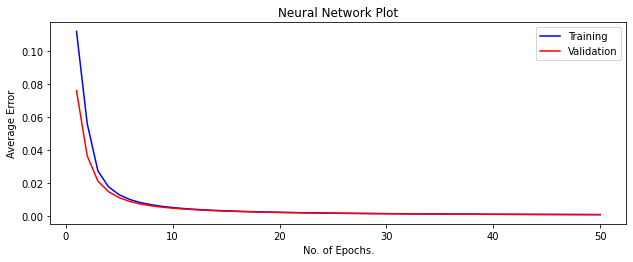

In [41]:
fig, axs = plt.subplots(1,figsize=(10,2),sharex=True, sharey=False)
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9, top=1.5,wspace=0.4,hspace=0.4)

axs.set_title('Neural Network Plot')
axs.plot(list(range(1,n_epoch+1)), Avg_error_list_training, color='blue', label='Training')
axs.plot(list(range(1,n_epoch+1)), Avg_error_list_validation, color='red', label='Validation')
axs.legend()
axs.set(xlabel='No. of Epochs.', ylabel='Average Error')

##### Decision Region Plot

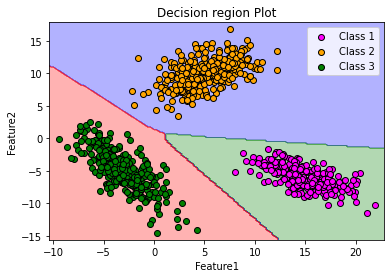

In [20]:

X=np.delete(training_data,0,axis=1)
y=Training_target_label

colors = ('green', 'blue','red') 
cmap = ListedColormap(colors[:len(np.unique(y))])
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2), np.arange(x2_min, x2_max, 0.2))

Z= np.array([xx1.ravel(), xx2.ravel()]).T
data_class=np.insert(Z.astype(float), 0, 1, axis=1)
predict=[]

for i in data_class:
  a1 = np.matmul(Weights_hidden_layer1.T, i) 
  h1 = logistic(a1) 
  ao = np.matmul(Weights_outer_layer.T, h1) 
  ho = logistic(ao)
  predict.append(np.argmax(ho) + 1) 
     
predict = np.reshape(predict, xx1.shape)

fig, ax = plt.subplots()
plt.contourf(xx1, xx2, predict, alpha=0.3, cmap=cmap)

ax.scatter(train_c1[:, 1], train_c1[:, 2], color='magenta' ,label='Class 1', edgecolors='black')
ax.scatter(train_c2[:, 1], train_c2[:, 2], color='orange' ,label='Class 2', edgecolors='black')
ax.scatter(train_c3[:, 1], train_c3[:, 2], color='green',label='Class 3', edgecolors='black')
ax.set(xlabel='Feature1', ylabel='Feature2')

plt.legend()
plt.title('Decision region Plot')
plt.show()

##### Confusion Matrix

In [21]:
# import numpy as np
# import seaborn as sns
# import matplotlib.pyplot as plt
# from sklearn.metrics import confusion_matrix

# # Example true and predicted labels
# y_true = np.array([1, 0, 0, 1, 1, 0, 1])
# y_pred = np.array([1, 0, 1, 1, 0, 0, 1])

# # Create confusion matrix
# cm = confusion_matrix(y_true, y_pred)

# # Plot confusion matrix as heatmap
# sns.heatmap(cm, annot=True, cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.show()


In [22]:
# Test_Data = np.concatenate((test_c1, test_c2, test_c3), axis=0)
# True_labels = np.concatenate((np.full(shape=test_c1.shape[0], fill_value=1),np.full(shape=test_c2.shape[0], fill_value=2), np.full(shape=test_c3.shape[0], fill_value=3)), axis=0)   
# Test_Data.shape, True_labels.shape

In [23]:
# predicted_labels = []
# for sample in Test_Data:
#     predicted_labels.append(l_classifier.predict(sample=sample))

In [24]:
# from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, recall_score
# print(f'Confusion matrix:\n{confusion_matrix(all_true_labels, all_pred_labels)}')
# print(f'Acccuracy: {accuracy_score(all_true_labels, all_pred_labels)}')
# print(f'Recall: {recall_score(all_true_labels, all_pred_labels, labels=(1, 2, 3), average="micro")}')
# print(f'f1-score: {f1_score(all_true_labels, all_pred_labels, labels=(1, 2, 3), average="micro")}')

##### output of neuron 

###### Hidden layer

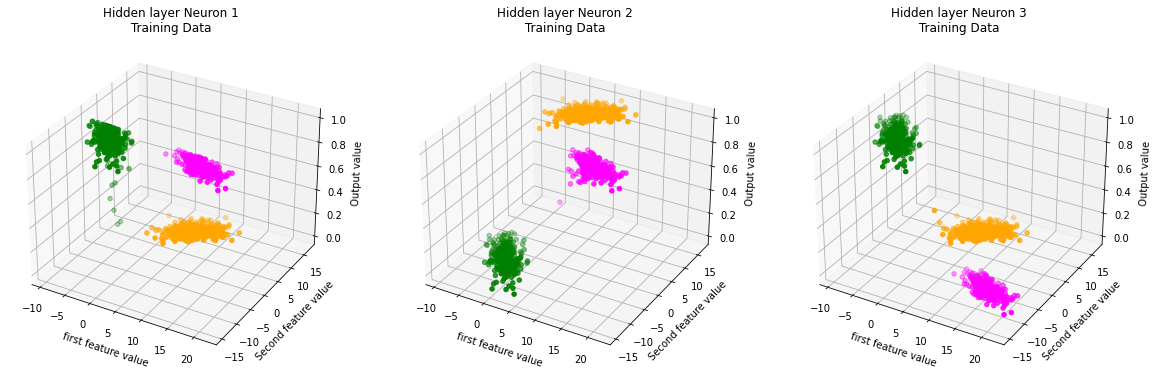

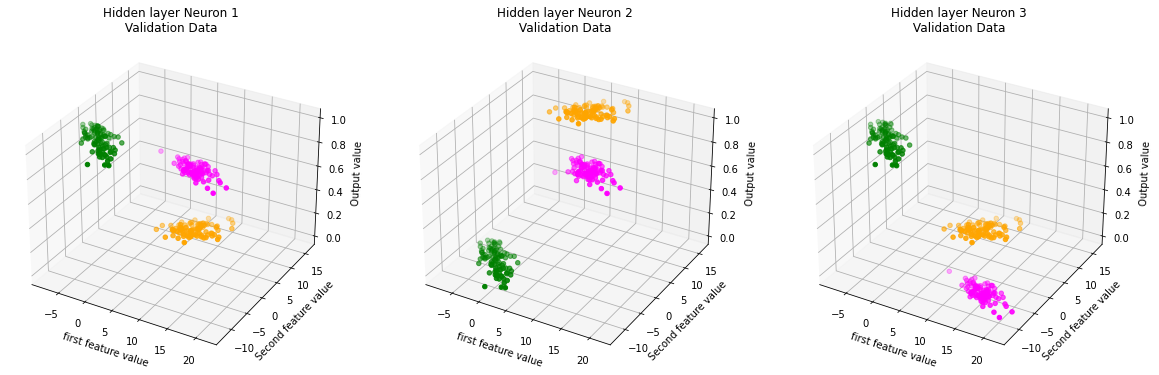

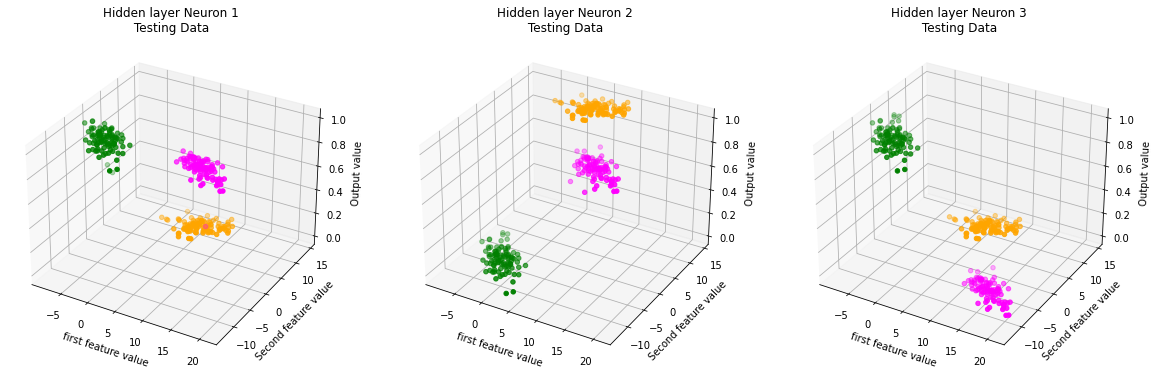

In [25]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10), subplot_kw={'projection': '3d'})
for j in range(Hidden_layer1_neuron):
    neuron_Hidden = []
    for i in training_data:
        a1 = np.matmul(Weights_hidden_layer1.T,i) 
        h1 = logistic(a1)
        neuron_Hidden.append(h1[j])

    ax = axs[j]
    ax.scatter(train_c1[:, 1], train_c1[:, 2], np.array(neuron_Hidden)[:300], color='magenta', label='Class 1')
    ax.scatter(train_c2[:, 1], train_c2[:, 2], np.array(neuron_Hidden)[300:600], color='orange', label='Class 2')
    ax.scatter(train_c3[:, 1], train_c3[:, 2], np.array(neuron_Hidden)[600:900], color='green', label='Class 3')
    ax.set_xlabel("first feature value")
    ax.set_ylabel("Second feature value")
    ax.set_zlabel("Output value")
    ax.set_title("Hidden layer Neuron " + str(j+1) +"\n Training Data ")

plt.show()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10), subplot_kw={'projection': '3d'})
for j in range(Hidden_layer1_neuron):
    neuron_Hidden = []
    for i in validation_data:
        a1 = np.matmul(Weights_hidden_layer1.T,i) 
        h1 = logistic(a1)
        neuron_Hidden.append(h1[j])

    ax = axs[j]
    ax.scatter(val_c1[:, 1], val_c1[:, 2], np.array(neuron_Hidden)[:100], color='magenta', label='Class 1')
    ax.scatter(val_c2[:, 1], val_c2[:, 2], np.array(neuron_Hidden)[100:200], color='orange', label='Class 2')
    ax.scatter(val_c3[:, 1], val_c3[:, 2], np.array(neuron_Hidden)[200:300], color='green', label='Class 3')
    ax.set_xlabel("first feature value")
    ax.set_ylabel("Second feature value")
    ax.set_zlabel("Output value")
    ax.set_title("Hidden layer Neuron " + str(j+1) +"\n Validation Data ")

plt.show()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10), subplot_kw={'projection': '3d'})
for j in range(Hidden_layer1_neuron):
    neuron_Hidden = []
    for i in Testing_data:
        a1 = np.matmul(Weights_hidden_layer1.T,i) 
        h1 = logistic(a1)
        neuron_Hidden.append(h1[j])

    ax = axs[j]
    ax.scatter(test_c1[:, 1], test_c1[:, 2], np.array(neuron_Hidden)[:100], color='magenta', label='Class 1')
    ax.scatter(test_c2[:, 1], test_c2[:, 2], np.array(neuron_Hidden)[100:200], color='orange', label='Class 2')
    ax.scatter(test_c3[:, 1], test_c3[:, 2], np.array(neuron_Hidden)[200:300], color='green', label='Class 3')
    ax.set_xlabel("first feature value")
    ax.set_ylabel("Second feature value")
    ax.set_zlabel("Output value")
    ax.set_title("Hidden layer Neuron " + str(j+1) +"\n Testing Data ")

plt.show()



###### output layer

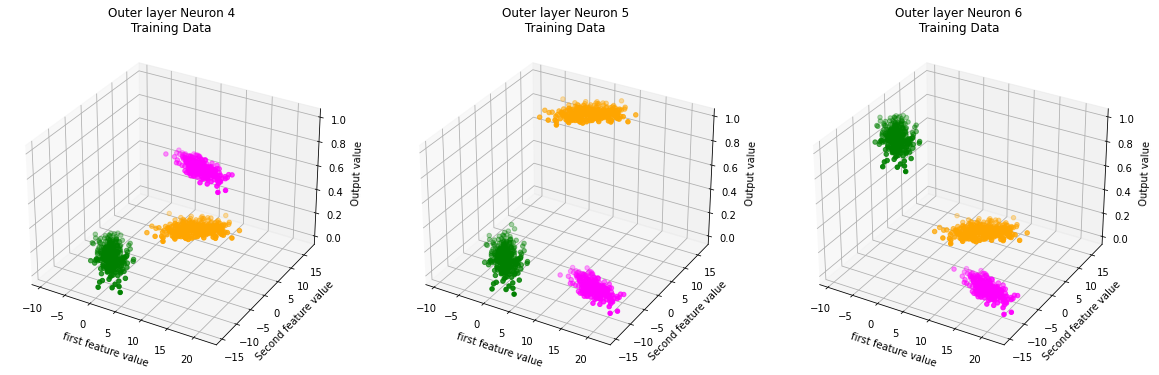

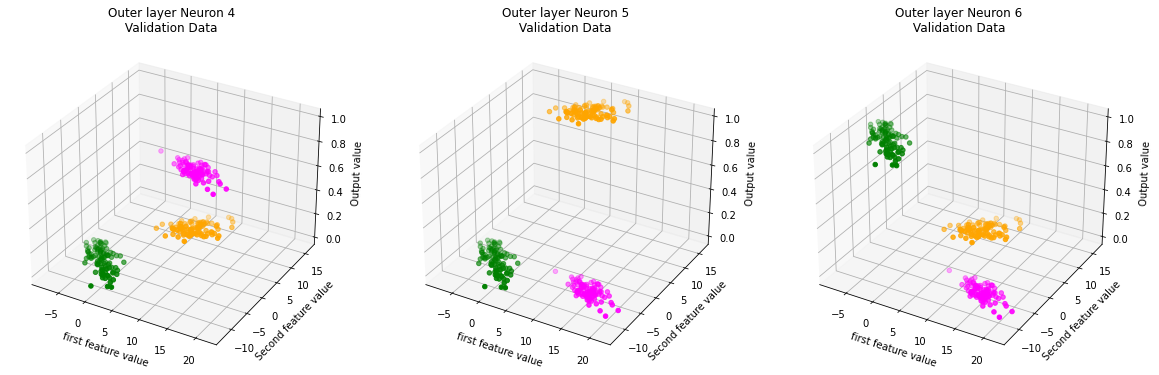

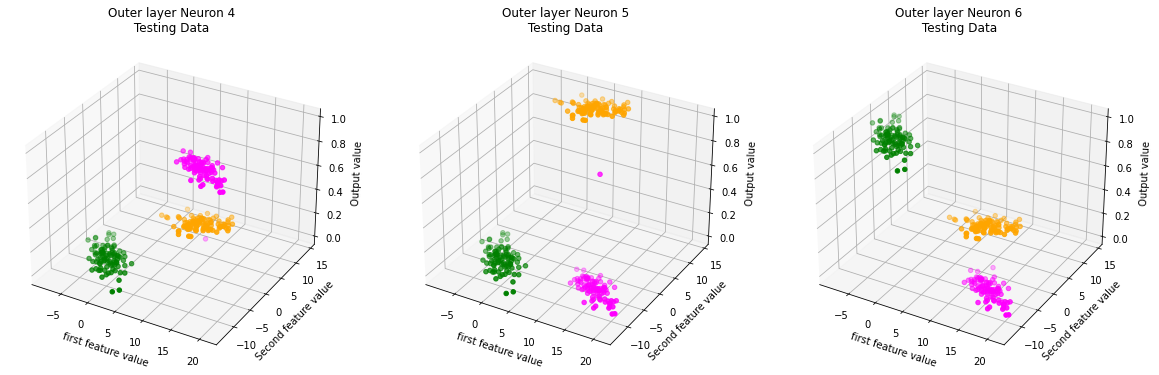

In [26]:
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10), subplot_kw={'projection': '3d'})
for j in range(classes):
    neuron_outer = []
    for i in training_data:
        a1 = np.matmul(Weights_hidden_layer1.T, i) 
        h1 = logistic(a1) 
        ao = np.matmul(Weights_outer_layer.T, h1) 
        ho = logistic(ao)
        neuron_outer.append(ho[j])

    ax = axs[j]
    ax.scatter(train_c1[:, 1], train_c1[:, 2], np.array(neuron_outer)[:300], color='magenta', label='Class 1')
    ax.scatter(train_c2[:, 1], train_c2[:, 2], np.array(neuron_outer)[300:600], color='orange', label='Class 2')
    ax.scatter(train_c3[:, 1], train_c3[:, 2], np.array(neuron_outer)[600:900], color='green', label='Class 3')
    ax.set_xlabel("first feature value")
    ax.set_ylabel("Second feature value")
    ax.set_zlabel("Output value")
    ax.set_title("Outer layer Neuron " + str(j+1+Hidden_layer1_neuron) +"\n Training Data ")

plt.show()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10), subplot_kw={'projection': '3d'})
for j in range(classes):
    neuron_outer = []
    for i in validation_data:
        a1 = np.matmul(Weights_hidden_layer1.T, i) 
        h1 = logistic(a1) 
        ao = np.matmul(Weights_outer_layer.T, h1) 
        ho = logistic(ao)
        neuron_outer.append(ho[j])

    ax = axs[j]
    ax.scatter(val_c1[:, 1], val_c1[:, 2], np.array(neuron_outer)[:100], color='magenta', label='Class 1')
    ax.scatter(val_c2[:, 1], val_c2[:, 2], np.array(neuron_outer)[100:200], color='orange', label='Class 2')
    ax.scatter(val_c3[:, 1], val_c3[:, 2], np.array(neuron_outer)[200:300], color='green', label='Class 3')
    ax.set_xlabel("first feature value")
    ax.set_ylabel("Second feature value")
    ax.set_zlabel("Output value")
    ax.set_title("Outer layer Neuron " + str(j+1+Hidden_layer1_neuron) +"\n Validation Data ")

plt.show()

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(20,10), subplot_kw={'projection': '3d'})
for j in range(classes):
    neuron_outer = []
    for i in Testing_data:
        a1 = np.matmul(Weights_hidden_layer1.T, i) 
        h1 = logistic(a1) 
        ao = np.matmul(Weights_outer_layer.T, h1) 
        ho = logistic(ao)
        neuron_outer.append(ho[j])

    ax = axs[j]
    ax.scatter(test_c1[:, 1], test_c1[:, 2], np.array(neuron_outer)[:100], color='magenta', label='Class 1')
    ax.scatter(test_c2[:, 1], test_c2[:, 2], np.array(neuron_outer)[100:200], color='orange', label='Class 2')
    ax.scatter(test_c3[:, 1], test_c3[:, 2], np.array(neuron_outer)[200:300], color='green', label='Class 3')
    ax.set_xlabel("first feature value")
    ax.set_ylabel("Second feature value")
    ax.set_zlabel("Output value")
    ax.set_title("Outer layer Neuron " + str(j+1+Hidden_layer1_neuron) +"\n Testing Data ")

plt.show()



#### Non-linearly separable data

In [3]:
path_nls ='/content/drive/MyDrive/Deep_learning/Group09_1/Classification/NLS_Group09.txt'

In [6]:
Data_nls= np.loadtxt(path_nls, delimiter=' ', skiprows=1, dtype=str)

data_class1_nls,data_class2_nls, data_class3_nls=np.split(Data_nls,[500,1000])

data_class1_nls=np.delete(data_class1_nls,2,axis=1)
data_class2_nls=np.delete(data_class2_nls,2,axis=1)
data_class3_nls=np.delete(data_class3_nls,2,axis=1)

data_class1_nls=np.insert(data_class1_nls.astype(float), 0, 1, axis=1)
data_class2_nls=np.insert(data_class2_nls.astype(float), 0, 1, axis=1)
data_class3_nls=np.insert(data_class3_nls.astype(float), 0, 1, axis=1)

train_nls_c1,val_nls_c1,test_nls_c1 = np.split(data_class1_nls,[int(0.6 * len(data_class1_nls)),int(0.8 * len(data_class1_nls))])
train_nls_c2,val_nls_c2,test_nls_c2 = np.split(data_class2_nls,[int(0.6 * len(data_class2_nls)),int(0.8 * len(data_class2_nls))])
train_nls_c3,val_nls_c3,test_nls_c3 = np.split(data_class3_nls,[int(0.6 * len(data_class3_nls)),int(0.8 * len(data_class3_nls))])


#### Plotting Non linearly separable Data

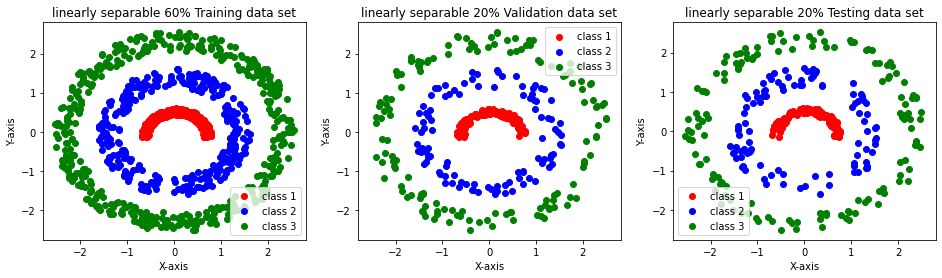

In [7]:
fig, ax = plt.subplots(1,3,figsize=(16,4), sharex=True)
ax[0].scatter(np.delete(train_nls_c1,[0,2],axis=1) ,np.delete(train_nls_c1,[0,1],axis=1) , color='red', label='class 1')
ax[0].scatter(np.delete(train_nls_c2,[0,2],axis=1) ,np.delete(train_nls_c2,[0,1],axis=1), color='blue', label='class 2')
ax[0].scatter(np.delete(train_nls_c3,[0,2],axis=1) ,np.delete(train_nls_c3,[0,1],axis=1), color='green', label='class 3')
ax[0].legend()
ax[0].set_xlabel('X-axis')
ax[0].set_ylabel('Y-axis')
ax[0].title.set_text("linearly separable 60% Training data set") 

ax[1].scatter(np.delete(val_nls_c1,[0,2],axis=1) ,np.delete(val_nls_c1,[0,1],axis=1) , color='red', label='class 1')
ax[1].scatter(np.delete(val_nls_c2,[0,2],axis=1) ,np.delete(val_nls_c2,[0,1],axis=1), color='blue', label='class 2')
ax[1].scatter(np.delete(val_nls_c3,[0,2],axis=1) ,np.delete(val_nls_c3,[0,1],axis=1), color='green', label='class 3')
ax[1].legend()
ax[1].set_xlabel('X-axis')
ax[1].set_ylabel('Y-axis')
ax[1].title.set_text("linearly separable 20% Validation data set")

ax[2].scatter(np.delete(test_nls_c1,[0,2],axis=1) ,np.delete(test_nls_c1,[0,1],axis=1) , color='red', label='class 1')
ax[2].scatter(np.delete(test_nls_c2,[0,2],axis=1) ,np.delete(test_nls_c2,[0,1],axis=1), color='blue', label='class 2')
ax[2].scatter(np.delete(test_nls_c3,[0,2],axis=1) ,np.delete(test_nls_c3,[0,1],axis=1), color='green', label='class 3')
ax[2].legend()
ax[2].set_xlabel('X-axis')
ax[2].set_ylabel('Y-axis')
ax[2].title.set_text("linearly separable 20% Testing data set")
plt.show()


#####  Training Non-linear separable Neural Network

In [8]:
training_nls_data=np.concatenate((train_nls_c1, train_nls_c2,train_nls_c3), axis=0)
Training_nls_target_label= np.concatenate((np.zeros(len(train_nls_c1)),np.ones(len(train_nls_c2)),np.ones(len(train_nls_c3))*2), axis=None)

validation_nls_data=np.concatenate((val_nls_c1,val_nls_c2,val_nls_c3),axis=0)
Validation_nls_target_label= np.concatenate((np.zeros(len(val_nls_c1)),np.ones(len(val_nls_c2)),np.ones(len(val_nls_c3))*2), axis=None)

Testing_nls_data=np.concatenate((test_nls_c1,test_nls_c2,test_nls_c3),axis=0)
Testing_nls_target_label= np.concatenate((np.zeros(len(test_nls_c1)),np.ones(len(test_nls_c2)),np.ones(len(test_nls_c3))*2), axis=None)

labels={0:[1,0,0],1:[0,1,0],2:[0,0,1]}

In [42]:
n_epoch=100
learning_factor=0.05
Hidden_layer1_neuron=3
Hidden_layer2_neuron=3
classes=3
Features=data_class1_nls.shape[1]-1

Weights_nls_hidden_layer1 = np.random.randn(Features+1, Hidden_layer1_neuron)
Weights_nls_hidden_layer2 = np.random.randn(Hidden_layer1_neuron, Hidden_layer2_neuron) 
Weights_nls_outer_layer = np.random.randn(Hidden_layer2_neuron, classes) 

print("<-----------------No. of Epoch= "+str(n_epoch)+"----------------->")

Avg_error_list_training=[]
Avg_error_list_validation=[]

counter=0
while counter!=n_epoch:
  Error_list_training=[]
  Error_list_validation=[]

  for i in np.random.permutation(len(training_nls_data)):
    a1 = np.matmul(Weights_nls_hidden_layer1.T, training_nls_data[i]) 
    h1 = logistic(a1) 
    a2 = np.matmul(Weights_nls_hidden_layer2.T, h1) 
    h2 = logistic(a2)
    ao = np.matmul(Weights_nls_outer_layer.T, h2) 
    ho = logistic(a2)

    error=0.5*(labels[Training_nls_target_label[i]]-ho)**2   
    Error_list_training.append(error)
    delta_o = ((labels[Training_nls_target_label[i]]-ho)*ho*(1-ho))
    Weights_nls_outer_layer += learning_factor*np.outer(h2, delta_o)
    delta_h2 = np.matmul(Weights_nls_outer_layer, delta_o)*h2*(1-h2)

    Weights_nls_hidden_layer2 += learning_factor*np.outer( h1, delta_h2) 
    delta_h = np.matmul(Weights_nls_hidden_layer2, delta_h2)*h1*(1-h1)
    Weights_nls_hidden_layer1 += learning_factor*np.outer( training_nls_data[i], delta_h)

  for i in np.random.permutation(len(validation_nls_data)):
    a1 = np.matmul(Weights_nls_hidden_layer1.T, validation_nls_data[i]) 
    h1 = logistic(a1) 
    a2 = np.matmul(Weights_nls_hidden_layer2.T, h1) 
    h2 = logistic(a2)
    ao = np.matmul(Weights_nls_outer_layer.T, h1) 
    ho = logistic(a2)

    error=0.5*(labels[Validation_nls_target_label[i]]-ho)**2   
    Error_list_validation.append(error)
    delta_o = ((labels[Validation_nls_target_label[i]]-ho)*ho*(1-ho))
    Weights_nls_outer_layer += learning_factor*np.outer(h2, delta_o)
    delta_h2 = np.matmul(Weights_nls_outer_layer, delta_o)*h2*(1-h2)
    Weights_nls_hidden_layer2 += learning_factor*np.outer(h1, delta_h2)
    delta_h = np.matmul(Weights_nls_hidden_layer2, delta_h2)*h1*(1-h1)
    Weights_nls_hidden_layer1 += learning_factor*np.outer( validation_nls_data[i], delta_h)
  
  Avg_error_list_validation.append(np.average(Error_list_validation))
  Avg_error_list_training.append(np.average(Error_list_training))
  counter=counter+1

<-----------------No. of Epoch= 100----------------->


##### Graph Plot Non linear separable data

[Text(0.5, 0, 'No. of Epochs.'), Text(0, 0.5, 'Average Error')]

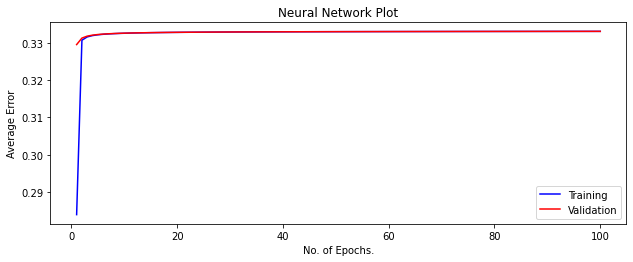

In [32]:
fig, axs = plt.subplots(1,figsize=(10,2),sharex=True, sharey=False)
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9, top=1.5,wspace=0.4,hspace=0.4)

axs.set_title('Neural Network Plot')
axs.plot(list(range(1,n_epoch+1)), Avg_error_list_training, color='blue', label='Training')
axs.plot(list(range(1,n_epoch+1)), Avg_error_list_validation, color='red', label='Validation')
axs.legend()
axs.set(xlabel='No. of Epochs.', ylabel='Average Error')

##### Decision Region Plot

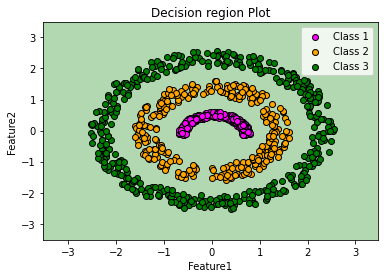

In [46]:
X=np.delete(training_nls_data,0,axis=1)
y=Training_nls_target_label

colors = ('green', 'blue','red') 
cmap = ListedColormap(colors[:len(np.unique(y))])
x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.2), np.arange(x2_min, x2_max, 0.2))

Z= np.array([xx1.ravel(), xx2.ravel()]).T
data_class=np.insert(Z.astype(float), 0, 1, axis=1)
predict=[]

for i in data_class:
    a1 = np.matmul(Weights_nls_hidden_layer1.T,i) 
    h1 = logistic(a1) 
    a2 = np.matmul(Weights_nls_hidden_layer2.T, h1) 
    h2 = logistic(a2)
    ao = np.matmul(Weights_nls_outer_layer.T, h2) 
    ho = logistic(ao)
    predict.append(np.argmax(ho) + 1) 
     
predict = np.reshape(predict, xx1.shape)

fig, ax = plt.subplots()
plt.contourf(xx1, xx2, predict, alpha=0.3, cmap=cmap)
ax.scatter(train_nls_c1[:, 1], train_nls_c1[:, 2], color='magenta' ,label='Class 1', edgecolors='black')
ax.scatter(train_nls_c2[:, 1], train_nls_c2[:, 2], color='orange' ,label='Class 2', edgecolors='black')
ax.scatter(train_nls_c3[:, 1], train_nls_c3[:, 2], color='green',label='Class 3', edgecolors='black')
ax.set(xlabel='Feature1', ylabel='Feature2')

plt.legend()
plt.title('Decision region Plot')
plt.show()

# Regression Task

#### Univariate input Data

In [51]:
Data_uni='/content/drive/MyDrive/Deep_learning/Group09_Assignment1/Regression/UnivariateData/9.csv'

univariate_data=np.loadtxt(Data_uni,delimiter=",", dtype=float)
univariate_data_points, univariate_actual_values= np.split(univariate_data, 2, axis=1)
univariate_data_points=np.insert(univariate_data_points.astype(float), 0, 1, axis=1)

univariate_train,univariate_val,univariate_test = np.split(univariate_data_points,[int(0.6 * len(univariate_data_points)),int(0.8 * len(univariate_data_points))])
Actual_train_value,Actual_val_value,Actual_test_value=  np.split(univariate_actual_values,[int(0.6 * len(univariate_actual_values)),int(0.8 * len(data_class_1))])


#### Regression on Univariate data

In [50]:
n_epoch=50
learning_factor=0.05
Hidden_layer1_neuron=3
output_neuron=1
Features=univariate_data_points.shape[1]-1

Weights_hidden_layer1 = np.random.randn(Features+1, Hidden_layer1_neuron) 
Weights_outer_layer = np.random.randn(Hidden_layer1_neuron, output_neuron) 

print("<-----------------No. of Epoch= "+str(n_epoch)+"----------------->")

Avg_error_list_training=[]
Avg_error_list_validation=[]

counter=0
while counter!=n_epoch:
  Error_list_training=[]
  Error_list_validation=[]

  for i in np.random.permutation(len(univariate_train)):
    a1 = np.matmul(Weights_hidden_layer1.T, univariate_train[i]) 
    h1 = logistic(a1)
    ao = np.matmul(Weights_outer_layer.T, h1) 
    ho = ao 
    error=0.5*(Actual_train_value[i]-ho)**2   
    Error_list_training.append(error)
    delta_o = (Actual_train_value[i]-ho)
    Weights_outer_layer += learning_factor*np.outer(h1, delta_o)
    delta_h = np.matmul(Weights_outer_layer, delta_o)*h1*(1-h1)
    Weights_hidden_layer1 += learning_factor*np.outer( univariate_train[i], delta_h)

  for i in np.random.permutation(len(univariate_val)):
    a1 = np.matmul(Weights_hidden_layer1.T, univariate_val[i]) 
    h1 = logistic(a1) 
    ao = np.matmul(Weights_outer_layer.T, h1) 
    ho = ao
    error=0.5*(Actual_val_value[i]-ho)**2   
    Error_list_validation.append(error)
    delta_o = (Actual_val_value[i]-ho)
    Weights_outer_layer += learning_factor*np.outer(h1, delta_o)
    delta_h = np.matmul(Weights_outer_layer, delta_o)*h1*(1-h1)
    Weights_hidden_layer1 += learning_factor*np.outer( univariate_val[i], delta_h)
  
  Avg_error_list_validation.append(np.average(Error_list_validation))
  Avg_error_list_training.append(np.average(Error_list_training))
  counter=counter+1


<-----------------No. of Epoch= 50----------------->


#### Graph plot on univariate data

[Text(0.5, 0, 'No. of Epochs.'), Text(0, 0.5, 'Average Error')]

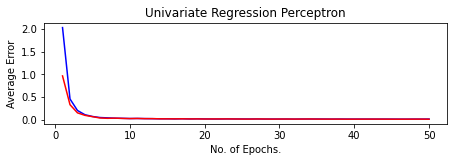

In [57]:
fig, axs = plt.subplots(1,figsize=(7,1),sharex=True, sharey=False)
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9, top=1.5,wspace=0.4,hspace=0.4)

axs.set_title('Univariate Regression Perceptron')
axs.plot(list(range(1,n_epoch+1)), Avg_error_list_training, color='blue', label='Training')
axs.plot(list(range(1,n_epoch+1)), Avg_error_list_validation, color='red', label='Validation')
axs.set(xlabel='No. of Epochs.', ylabel='Average Error')

#### 2-D Bivariate input Data 

In [ ]:
Data_Bi='/content/drive/MyDrive/Deep_learning/Group09_Assignment1/Regression/BivariateData/9.csv'

bivariate_data=np.loadtxt(Data_Bi,delimiter=",", dtype=float)
bivariate_data_points, bivariate_actual_values= np.split(bivariate_data, [2], axis=1)
bivariate_data_points=np.insert(bivariate_data_points.astype(float), 2, 1, axis=1)

bivariate_train, bivariate_test = np.split(bivariate_data_points,[int(0.6 * len(bivariate_data_points)),int(0.8 * len(bivariate_data_points))])
Bi_Actual_train_value, Bi_Actual_test_value=  np.split(bivariate_actual_values,[int(0.6 * len(bivariate_actual_values)),int(0.8 * len(bivariate_actual_values))])

#### Regression on Bivariate Data

In [ ]:
weights_bi=np.array([0.4,0.4,0.4]) # [w1,w2,w0] between the input range
Avg_error_bi=np.array([])

n_epoch=100
learning_factor=0.05
print("<-----------------No. of Epoch= "+str(n_epoch)+"----------------->")

counter=0
while counter!=n_epoch:
  Error_bi=np.array([])
  for i in np.random.permutation(len(bivariate_train)):
    predicted_value=np.dot(bivariate_train[i],weights_bi)
    error=0.5*(Bi_Actual_train_value[i]-predicted_value)**2
    Error_bi=np.append(Error_bi, error)
    delta_weight=(learning_factor*(Bi_Actual_train_value[i]-predicted_value)*predicted_value*(1-predicted_value))*bivariate_train[i]
    weights_bi=np.add(weights_bi, delta_weight)
  Average_error=np.mean(Error_bi, axis = 0)  
  Avg_error_bi=np.append(Avg_error_bi, Average_error) 
  #print("At Epoch="+str(counter+1)+", the average error is calculated as: "+str(Average_error))
  
  counter=counter+1

<-----------------No. of Epoch= 100----------------->


#### Graph Plot

[Text(0.5, 0, 'No. of Epochs.'), Text(0, 0.5, 'Average Error')]

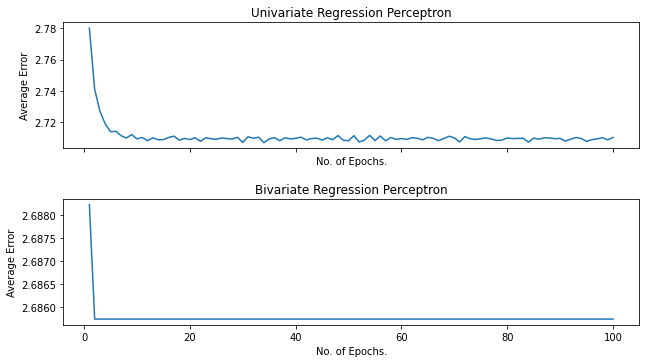

In [ ]:
fig, axs = plt.subplots(2,figsize=(10,3),sharex=True, sharey=False)
plt.subplots_adjust(left=0.1,bottom=0.1,right=0.9, top=1.5,wspace=0.4,hspace=0.4)

axs.set_title('Bivariate Regression Perceptron')
axs.plot(list(range(1,n_epoch+1)), Avg_error_bi)
axs.set(xlabel='No. of Epochs.', ylabel='Average Error')


#### Mean Squared Error Univariate data

In [ ]:
Error_uni_mse=np.array([])
Mean_Squared_Error_train=0
for i in np.random.permutation(len(univariate_train)):
  predicted_value=np.dot(univariate_train[i],weights_uni)
  error=(Actual_train_value[i]-predicted_value)**2 ## Check
  Error_uni_mse=np.append(Error_uni_mse, error)
Mean_Squared_Error_train=np.mean(Error_uni_mse)

Error_uni_mse=np.array([])
Mean_Squared_Error_test=0
for i in np.random.permutation(len(univariate_test)):
  predicted_value=np.dot(univariate_test[i],weights_uni)
  error=(Actual_test_value[i]-predicted_value)**2 ## Check
  Error_uni_mse=np.append(Error_uni_mse, error)
Mean_Squared_Error_test=np.mean(Error_uni_mse)
  

##### Plot mean squared error 

([<matplotlib.axis.XTick at 0x7f41c0300c70>,
 [Text(1, 0, 'Training'), Text(2, 0, 'Testing')])

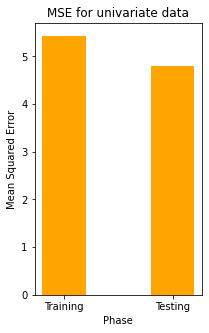

In [ ]:
xs = [1,2]
ys = [Mean_Squared_Error_train,Mean_Squared_Error_test]

labels = ['Training','Testing']

fig = plt.figure(figsize = (3, 5))
plt.bar(xs,ys, width=0.4,align='center',color='orange')
plt.xlabel("Phase")
plt.ylabel("Mean Squared Error")
plt.title("MSE for univariate data")
plt.xticks(xs,labels)


#### Mean Squared Error Bivariate data

In [ ]:
Error_bi_mse=np.array([])
Mean_Squared_Error_train=0
for i in np.random.permutation(len(bivariate_train)):
  predicted_value=np.dot(bivariate_train[i],weights_bi)
  error=(Bi_Actual_train_value[i]-predicted_value)**2 ## Check
  Error_bi_mse=np.append(Error_bi_mse, error)
Mean_Squared_Error_train=np.mean(Error_bi_mse)

Error_bi_mse=np.array([])
Mean_Squared_Error_test=0
for i in np.random.permutation(len(bivariate_test)):
  predicted_value=np.dot(bivariate_test[i],weights_bi)
  error=(Bi_Actual_test_value[i]-predicted_value)**2 ## Check
  Error_bi_mse=np.append(Error_bi_mse, error)
Mean_Squared_Error_test=np.mean(Error_bi_mse)
  

#### Plot mean squared error

([<matplotlib.axis.XTick at 0x7f41c0046070>,
 [Text(1, 0, 'Training'), Text(2, 0, 'Testing')])

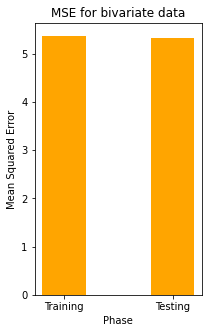

In [ ]:
xs = [1,2]
ys = [Mean_Squared_Error_train,Mean_Squared_Error_test]

labels = ['Training','Testing']

fig = plt.figure(figsize = (3, 5))
plt.bar(xs,ys, width=0.4,align='center',color='orange')
plt.xlabel("Phase")
plt.ylabel("Mean Squared Error")
plt.title("MSE for bivariate data")
plt.xticks(xs,labels)

#### Plot for univariate model output and target output for training 

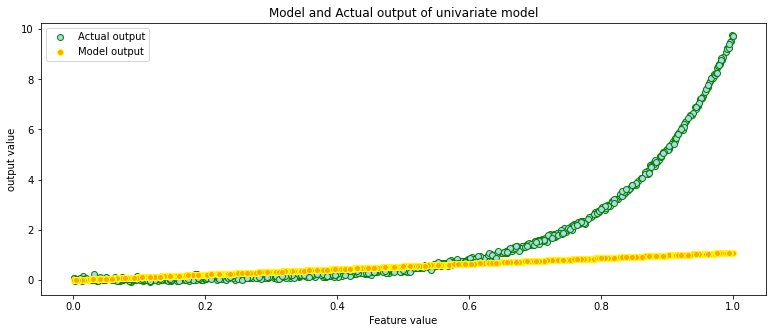

In [ ]:
model_output=np.array([])
for i in range(len(univariate_train)):
   predicted_value=np.dot(univariate_train[i],weights_uni)
   model_output=np.append( model_output,predicted_value)

fig = plt.figure(figsize = (13, 5))
plt.scatter(np.delete(univariate_train,1,axis=1), Actual_train_value, color='lightblue' ,label='Actual output', edgecolors='green')
plt.scatter(np.delete(univariate_train,1,axis=1),model_output, color='orange' ,label='Model output', edgecolors='yellow')
plt.legend()
plt.xlabel('Feature value')
plt.ylabel('output value')
plt.title('Model and Actual output of univariate model')
plt.show()

#### Plot for univariate model output and target output for testing

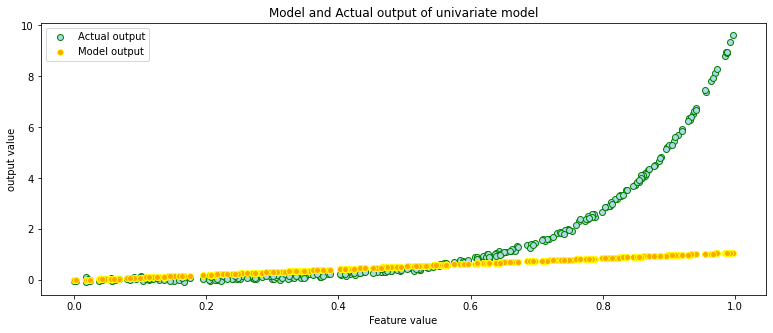

In [ ]:
model_output=np.array([])
for i in range(len(univariate_test)):
   predicted_value=np.dot(univariate_test[i],weights_uni)
   model_output=np.append( model_output,predicted_value)

fig = plt.figure(figsize = (13, 5))
plt.scatter(np.delete(univariate_test,1,axis=1), Actual_test_value, color='lightblue' ,label='Actual output', edgecolors='green')
plt.scatter(np.delete(univariate_test,1,axis=1),model_output, color='orange' ,label='Model output', edgecolors='yellow')
plt.legend()
plt.xlabel('Feature value')
plt.ylabel('output value')
plt.title('Model and Actual output of univariate model')
plt.show()

#### Plot for bivariate model output and target output for training

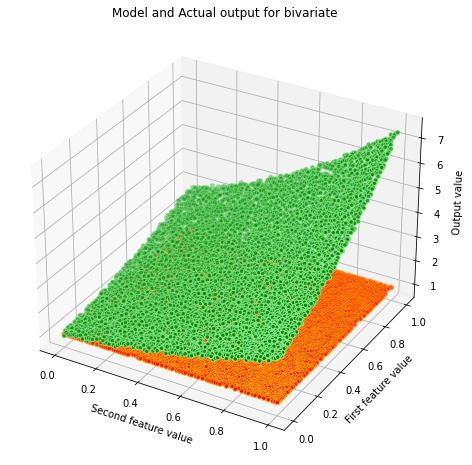

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


# Creating dataset
z = Bi_Actual_train_value
x = np.delete(bivariate_train,[0,2],axis=1) # 2nd feature
y = np.delete(bivariate_train,[1,2],axis=1) # 1st feature

model_output=np.array([])
for i in range(len(bivariate_train)):
   predicted_value=np.dot(bivariate_train[i],weights_bi)
   model_output=np.append(model_output,predicted_value)
 
fig = plt.figure(figsize = (12,8))
ax = plt.axes(projection ="3d")

ax.scatter3D(x, y, z, color = "green",edgecolors='lightgreen')
ax.scatter3D(x, y, model_output, color = "red",edgecolors='orange')
ax.set_xlabel("Second feature value ")
ax.set_ylabel("First feature value")
ax.set_zlabel(" Output value")
plt.title("Model and Actual output for bivariate")
 
# show plot
plt.show()

#### Plot for bivariate model output and target output for testing

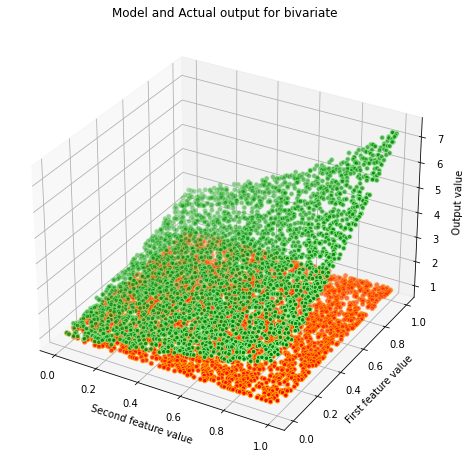

In [ ]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt


# Creating dataset
z = Bi_Actual_test_value
x = np.delete(bivariate_test,[0,2],axis=1) # 2nd feature
y = np.delete(bivariate_test,[1,2],axis=1) # 1st feature

model_output=np.array([])
for i in range(len(bivariate_test)):
   predicted_value=np.dot(bivariate_test[i],weights_bi)
   model_output=np.append(model_output,predicted_value)
 
fig = plt.figure(figsize = (12,8))
ax = plt.axes(projection ="3d")

ax.scatter3D(x, y, z, color = "green",edgecolors='lightgreen')
ax.scatter3D(x, y, model_output, color = "red",edgecolors='orange')
ax.set_xlabel("Second feature value ")
ax.set_ylabel("First feature value")
ax.set_zlabel(" Output value")
plt.title("Model and Actual output for bivariate")
 
# show plot
plt.show()

#### univariate scatter plot model and target output for training data 

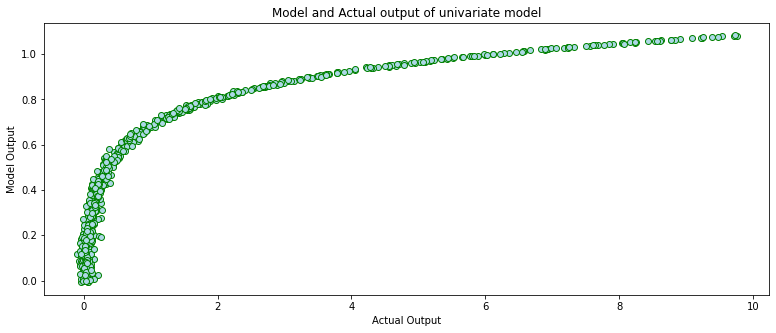

In [ ]:
model_output=np.array([])
for i in range(len(univariate_train)):
   predicted_value=np.dot(univariate_train[i],weights_uni)
   model_output=np.append( model_output,predicted_value)

fig = plt.figure(figsize = (13, 5))
plt.scatter(Actual_train_value,model_output, color='lightblue' , edgecolors='green')
plt.xlabel('Actual Output')
plt.ylabel('Model Output')
plt.title('Model and Actual output of univariate model')
plt.show()

#### univariate scatter plot model and target output for testing data

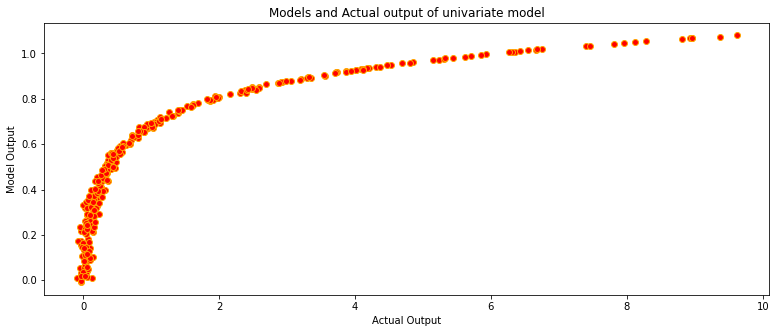

In [ ]:
model_output=np.array([])
for i in range(len(univariate_test)):
   predicted_value=np.dot(univariate_test[i],weights_uni)
   model_output=np.append( model_output,predicted_value)

fig = plt.figure(figsize = (13, 5))
plt.scatter(Actual_test_value,model_output,color = "red",edgecolors='orange')
plt.xlabel('Actual Output')
plt.ylabel('Model Output')
plt.title('Models and Actual output of univariate model')
plt.show()

#### Bivariate scatter plot model and target output for training data

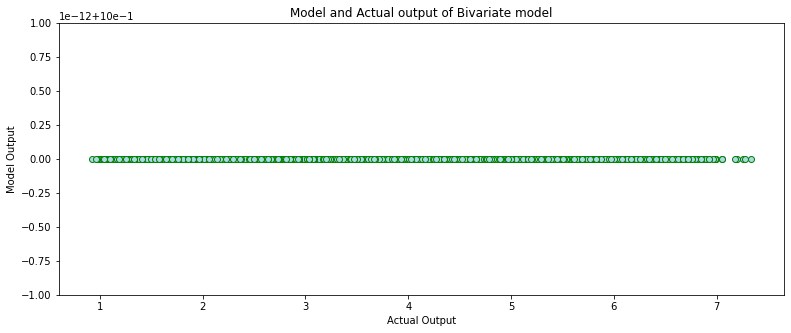

In [ ]:
model_output=np.array([])
for i in range(len(bivariate_train)):
   predicted_value=np.dot(bivariate_train[i],weights_bi)
   model_output=np.append( model_output,predicted_value)

fig = plt.figure(figsize = (13, 5))
plt.scatter(Bi_Actual_train_value,model_output,color='lightblue',edgecolors='green')
plt.xlabel('Actual Output')
plt.ylabel('Model Output')
plt.title('Model and Actual output of Bivariate model')
plt.show()

#### Bivariate scatter plot model and target output for testing data

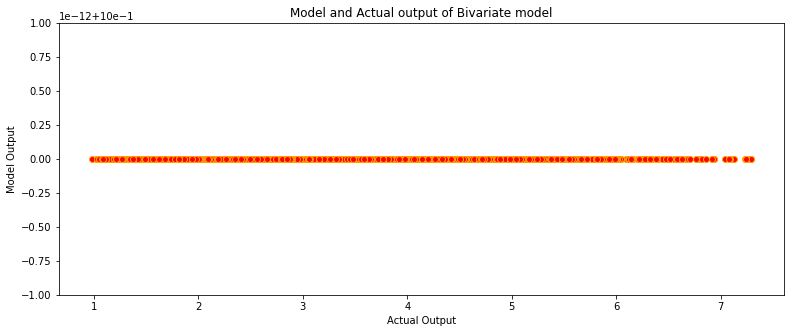

In [ ]:
model_output=np.array([])
for i in range(len(bivariate_test)):
   predicted_value=np.dot(bivariate_test[i],weights_bi)
   model_output=np.append( model_output,predicted_value)

fig = plt.figure(figsize = (13, 5))
plt.scatter(Bi_Actual_test_value,model_output,color = "red",edgecolors='orange')
plt.xlabel('Actual Output')
plt.ylabel('Model Output')
plt.title('Model and Actual output of Bivariate model')
plt.show()